Ref:/glade/u/home/prein/papers/2021_Object-Tracker-Intro/programs/plots/ClimatologicalAnalysis/ClimatologicalAnalysis.ipynb

In [12]:
import os
import datetime
import numpy as np
from netCDF4 import Dataset
import pandas as pd
from tqdm import tqdm
import string
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy 
import cartopy.crs as ccrs

#### setup input 

#### Read the netCDF file

In [13]:
flnm = '/glade/campaign/mmm/c3we/mingge/CESM2_LE/OBJ/185001_BHISTsmbb.f09_g17.LE2-1011.001.cam.h_ObjectMasks_dt-6h_PRTr-0.3_PRS-0_ARt-9_ARL-2000_CYt-12_FRA-50000_CLS-0_CLT-241_CLt-7_CLA-40000_IVTTr-500_IVTt-9.nc'
ncid = Dataset(flnm)
Lat=np.squeeze(ncid.variables['lat'][:])
Lon=np.squeeze(ncid.variables['lon'][:])
nx = Lon.shape[0]
ny = Lon.shape[1]
ncid.close()
print('grid is from ', flnm)

grid is from  /glade/campaign/mmm/c3we/mingge/CESM2_LE/OBJ/185001_BHISTsmbb.f09_g17.LE2-1011.001.cam.h_ObjectMasks_dt-6h_PRTr-0.3_PRS-0_ARt-9_ARL-2000_CYt-12_FRA-50000_CLS-0_CLT-241_CLt-7_CLA-40000_IVTTr-500_IVTt-9.nc


In [14]:
Objects = ['Cyclones','Anticyclones','Precipitation','Anviles','Fronts', 'MS'] 
n_obj = len(Objects)

In [24]:
#annualObjectFrequency = np.zeros((len(Years), nx, ny, len(Objects)))
#annualObjectFrequency[:] = np.nan
days = 365

ObjectFrequency = np.zeros(( nx, ny, n_obj))
ObjectFrequency[:] = np.nan
    
for ds in range(1):
    
    year_s = 1850
    year_e = 1859
    n_year = year_e - year_s + 1
    Years = range(year_s, year_e+1)
    
    annualObjectFrequency = np.zeros(( nx, ny, n_obj))
    annualObjectFrequency[:] = np.nan

    for a in range(1):
        flnm = 'annual_feature_frequ.npz'
        #print(ds, flnm)
        
        DATA = np.load(flnm)
        mean_cy = DATA['mean_cy']
        mean_acy = DATA['mean_acy']
        mean_pr = DATA['mean_pr']
        mean_anvil = DATA['mean_anvil']
        mean_fr = DATA['mean_fr']
        #mean_ar = DATA['mean_ar']
        mean_ms =  DATA['mean_ms']
        
        #print('Collect the annual frequency of objects')
        annualObjectFrequency[:,:,Objects.index('Cyclones')] = mean_cy
        annualObjectFrequency[:,:,Objects.index('Anticyclones')] = mean_acy
        annualObjectFrequency[:,:,Objects.index('Precipitation')] = mean_pr
        annualObjectFrequency[:,:,Objects.index('Anviles')] = mean_anvil
        annualObjectFrequency[:,:,Objects.index('Fronts')] = mean_fr
        #annualObjectFrequency[:,:,Objects.index('AR')] = mean_ar
        annualObjectFrequency[:,:,Objects.index('MS')] = mean_ms

    # annual average
    ObjectFrequency = annualObjectFrequency*days  
    
MIN = 1
ObjectFrequency[ObjectFrequency < MIN] = np.nan

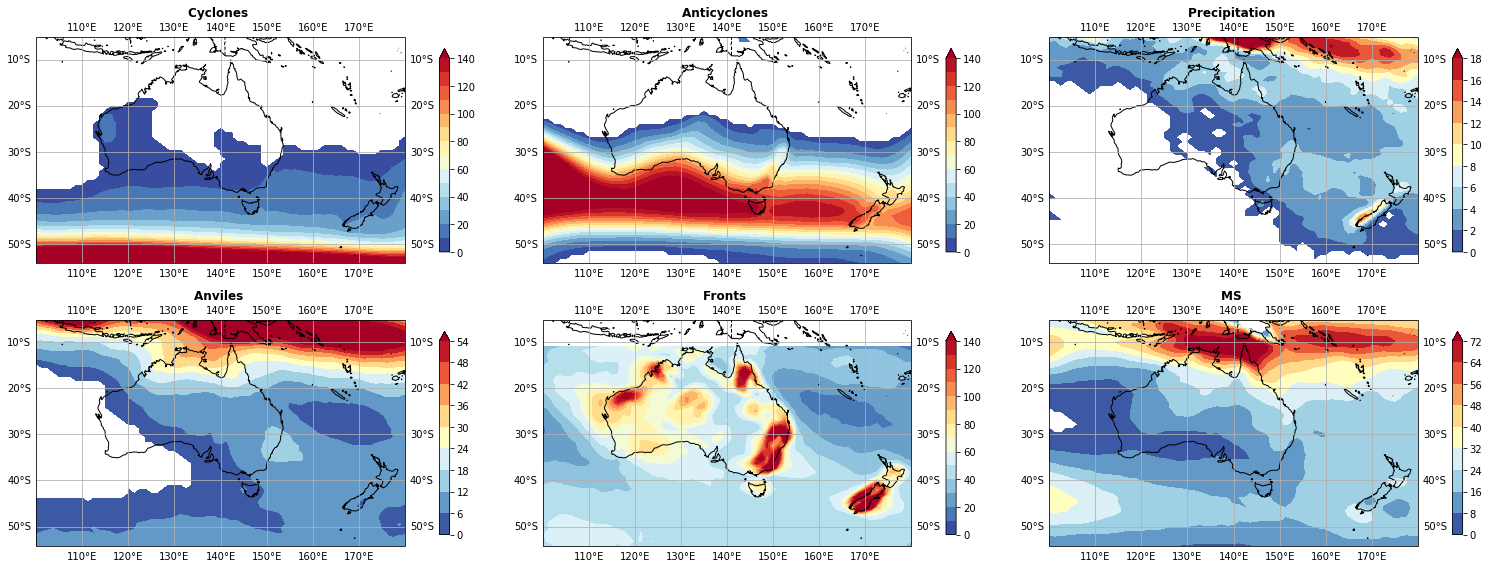

In [35]:
MIN     = [   4,         4,              1,            3,          1,     2]
Objects = ['Cyclones','Anticyclones','Precipitation','Anviles','Fronts', 'MS'] 
level_s = [np.arange(0, 150, 10), np.arange(0,150, 10), np.arange(0,20,2), np.arange(0, 60,6)
          ,np.arange(0,150,10),np.arange(0, 80, 8)]

proj = ccrs.PlateCarree()

fig, ax = plt.subplots(2, 3, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(24,8))
for obj in range(n_obj):
         
        #print(Objects[obj])
     
        nr = int(obj/3)
        nc = int((obj%3))
        #print(obj,nr, nc)
        
        DATAse = ObjectFrequency[:,:,Objects.index(Objects[obj])]
        DATAse[DATAse < MIN[obj]] = np.nan     
             
        im=ax[nr,nc].contourf(Lon, Lat, DATAse, transform=ccrs.PlateCarree(), 
                               add_colorbar=True,levels=level_s[obj],extend='max', cmap='RdYlBu_r')
        fig.colorbar(im, ax=ax[nr,nc], shrink=0.9)
        ax[nr,nc].coastlines()
        ax[nr,nc].add_feature(cartopy.feature.BORDERS, linestyle='--') 
        #ax[nr][nc].set_title(Objects[obj] + ' ' + dataset[ds])
        ax[nr][nc].set_title(Objects[obj] + " " , fontweight='bold')#, color= 'blue')
        xl = ax[nr,nc].gridlines(draw_labels=True)
        plt.tight_layout()

1 0


/glade/work/mingge/miniconda3/envs/casper_2020/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


1 1


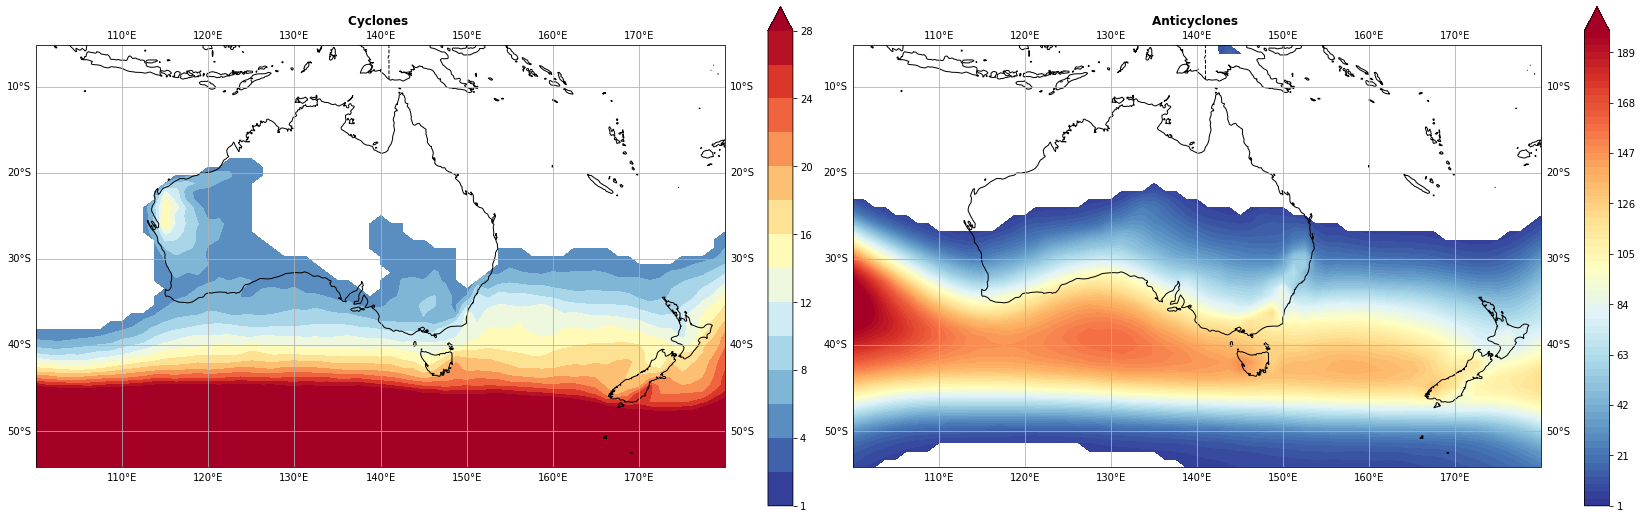

In [41]:
MIN     = [   4,         4,              1,            3,          1,     2]
Objects = ['Cyclones','Anticyclones','Precipitation','Anviles','Fronts', 'MS'] 
level_s = [np.arange(0, 30, 2), np.arange(0,200, 3), np.arange(0,20,2), np.arange(0, 60,6)
          ,np.arange(0,150,10),np.arange(0, 80, 8)]

proj = ccrs.PlateCarree()

fig, ax = plt.subplots(1, 2, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(24,8))
for obj in range(2):
         
        #print(Objects[obj])
         
        nc = int((obj%3))
        print(nr, nc)
        
        DATAse = ObjectFrequency[:,:,Objects.index(Objects[obj])]
        DATAse[DATAse < MIN[obj]] = np.nan     
        level_0 = level_s[obj]     
        level_0[0] = 1
        im=ax[nc].contourf(Lon, Lat, DATAse, transform=ccrs.PlateCarree(), 
                               add_colorbar=True, levels=level_0,extend='max', cmap='RdYlBu_r')
        fig.colorbar(im, ax=ax[nc], shrink=0.9)
        ax[nc].coastlines()
        ax[nc].add_feature(cartopy.feature.BORDERS, linestyle='--') 
        #ax[nr][nc].set_title(Objects[obj] + ' ' + dataset[ds])
        ax[nc].set_title(Objects[obj] + " " , fontweight='bold')#, color= 'blue')
        xl = ax[nc].gridlines(draw_labels=True)
        plt.tight_layout()
        
fig.savefig('lens2.pdf', bbox_inches='tight', dpi=400)

####  tracking parameters
SmoothSigmaP = 0  # Gaussion std for precipitation smoothing <br>
Pthreshold = .3   # precipitation threshold [mm/h]<br>
MinTimePR = 6     # in hours<br>
MinAreaPR = 5000  #2000 # km2<br>

#####  minimum Moisture Stream 
MinTimeMS = 9 # in hours<br>
MinAreaMS = 100000 # km2<br>
MinMSthreshold = 0.13 # 1 was default # g*m/g*s<br>

#####  cyclone tracking
MinTimeCY = 12 # minimum livetime in hours<br>
MaxPresAnCY = -8 # hPa<br>

#####  anty cyclone tracking
MinTimeACY = MinTimeCY # minimum livetime in hours<br>
MinPresAnACY = 6 # hPa<br>

#####  Frontal zones
MinAreaFR = 50000 # km2<br>

#####  Cloud tracking setup
SmoothSigmaC = 0<br>
Cthreshold = 241<br>
MinTimeC = 7 # in hours<br>
MinAreaC = 40000 # km<br>

#####  AR tracking
IVTtrheshold = 500 # [kg m-1 s-1]<br>
MinTimeIVT = 9 # hours<br>
AR_MinLen = 2000 # km<br>
AR_Lat = 20 # AR centroids have to be poeward of this latitude<br>
AR_width_lenght_ratio = 2<br>

#####  TC detection
TC_Pmin = 995 #995<br>
TC_lat_genesis = -35 #35  # absolute latitude<br>
TC_lat_max = -60 # 60 maximum latitue of a TC<br>
TC_deltaT_core = 0 #0  degree celsius<br>
TC_T850min = 285 # 285 minimum temperature of TC core at 850hPa<br>
TC_minBT = 241 # 220 K --> maximum average cloud top brightness temperature<br>

#####  MCs detection
MCS_Minsize = 5000 #km <br>
MCS_minPR = 6 # minimum max precipitation in mm/h<br>
CL_MaxT = 221 # minimum brightness temperature<br>
CL_Area = 40000 # min cloud area size in km2<br>
MCS_minTime = 6 # minimum time step (here 3-hours<br>